Data taken from https://www.kaggle.com/c/titanic/overview

# Titanic Analysis with ML Model

## Summary

### Survival of Males Versus Females on the Titanic?
- 
- 
- 

### Ticket Class Affect Survival?
- 
- 
- 

### Port of Embarkation Affect Survival?
- 
- 
- 

### Family Affect Survival?
- 
- 
- 

### Cost of Ticket Affect Survival?
- 
- 
- 

### Ages Affect Survival?
- 
- 
- 

### Baseline Model
- 
- 
- 

### Improved Model
- 
- 
- 



In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [183]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Droping Columns that add no value to the data

1. Passenger Id - This variable is not very useful because we do not know if it is the order that they boarded the ship, when they bought their ticket, or something else.

2. Cabin - This does not add a lot of value because there are lots of passengers who share rooms with others onboard, there are a lot of NaN values, and we already know what part of the ship the passenger is on by their Pclass

3. Ticket - This variable does not look like it has a pattern.

In [184]:
df = df.drop(labels=['PassengerId', 'Cabin', 'Ticket'], axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [186]:
df.isna().sum() #Data will be imputated later on in the analysis

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### What is the survival of Males versus Females on the Titanic?


Count of Male Versus Female
male      577
female    314
Name: Sex, dtype: int64

Proportion of Male Versus Female
male      0.647587
female    0.352413
Name: Sex, dtype: float64


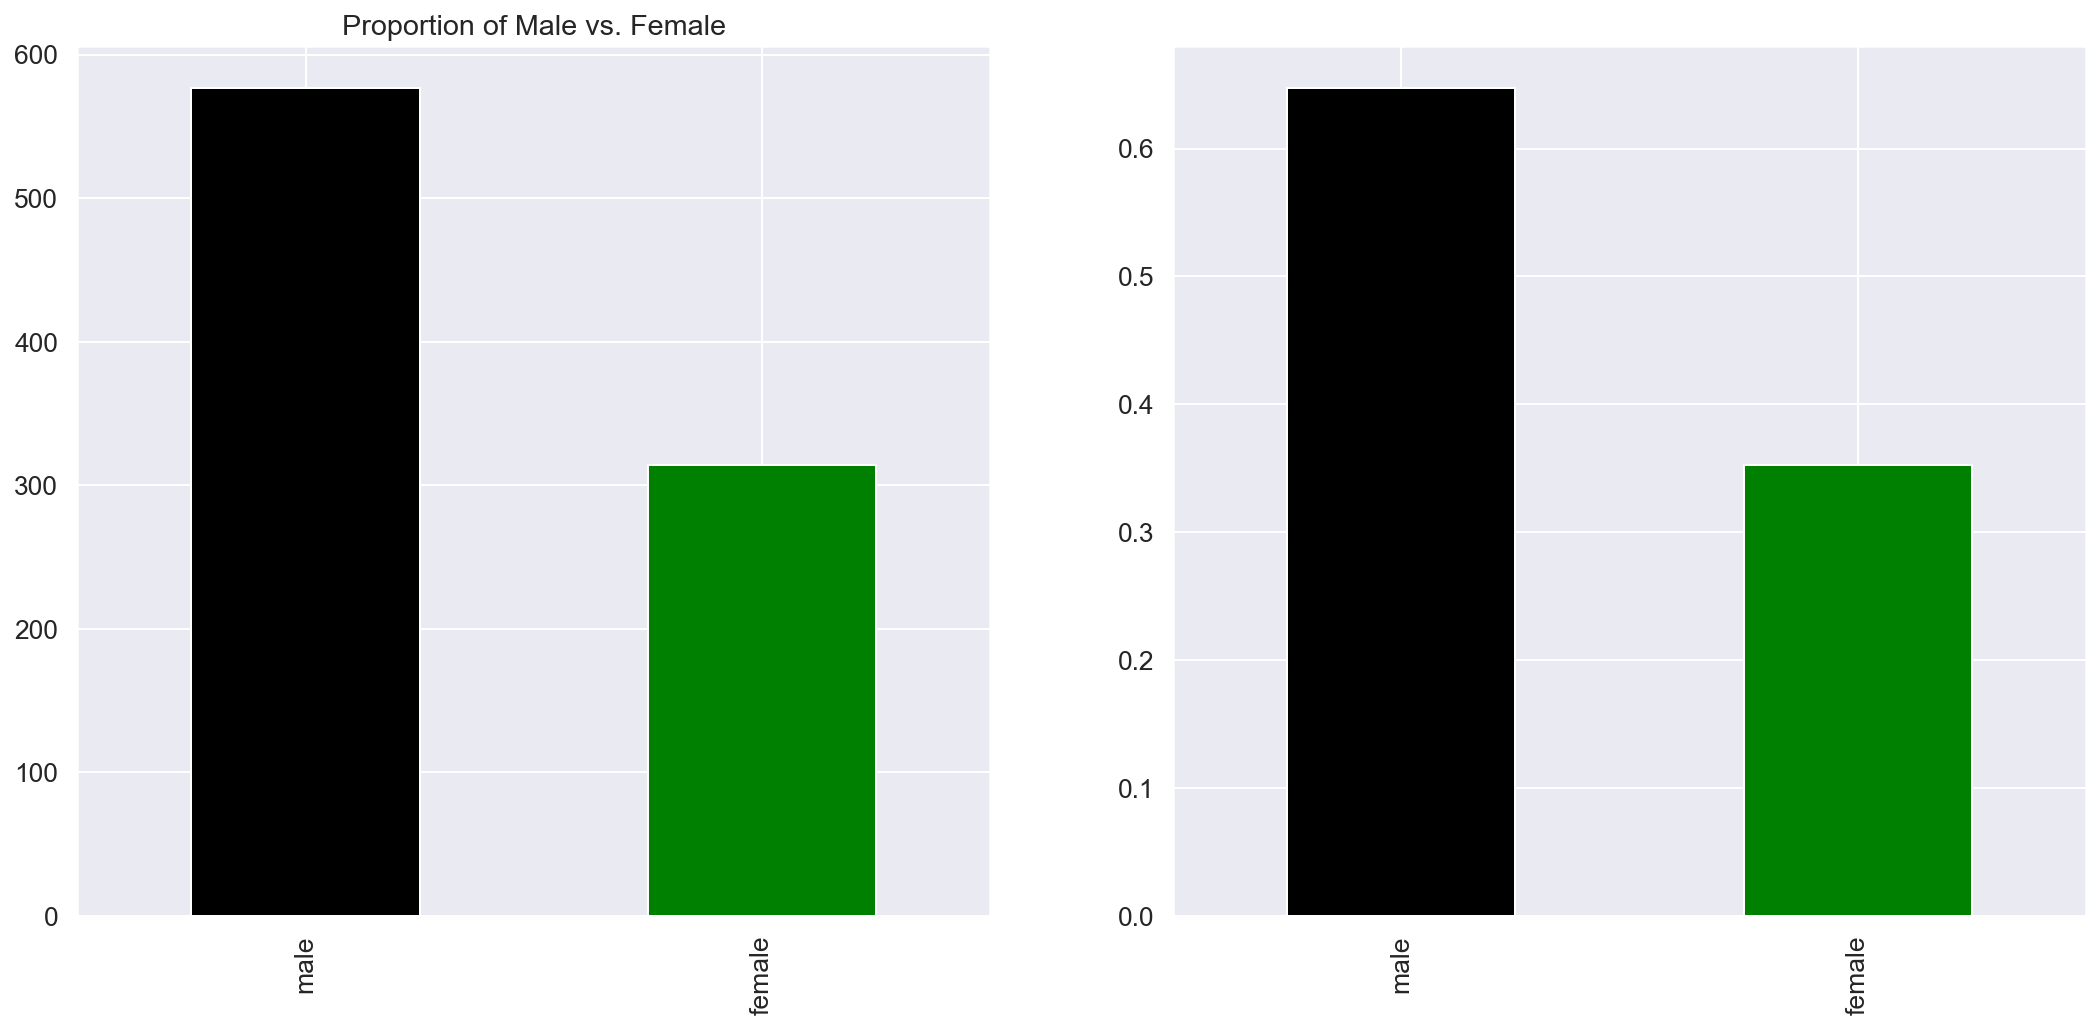

In [187]:
count_by_sex = df['Sex'].value_counts()
prop_by_sex = count_by_sex/len(df)

print("Count of Male Versus Female")
print(count_by_sex)
print()
print("Proportion of Male Versus Female")
print(df['Sex'].value_counts()/df['Sex'].value_counts().sum())

f,ax=plt.subplots(1,2,figsize=(18,8))
df['Sex'].value_counts().plot.bar(color=['black','green'], ax=ax[0])
ax[0].set_title('Count of Male vs Female Onboard')
prop_by_sex.plot.bar(color=['black','green'], ax=ax[1])
ax[0].set_title('Proportion of Male vs. Female')
plt.show()

As we can see from the figure above, there is almost double the number of males on the ship than females. 65% of the individuals on the ship are males while only 35% of the individuals on the ship are females.


Proportion Survived by Gender
        Survived
Sex             
female  0.742038
male    0.188908

Count Survived and Dead by Gender
Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Name, dtype: int64


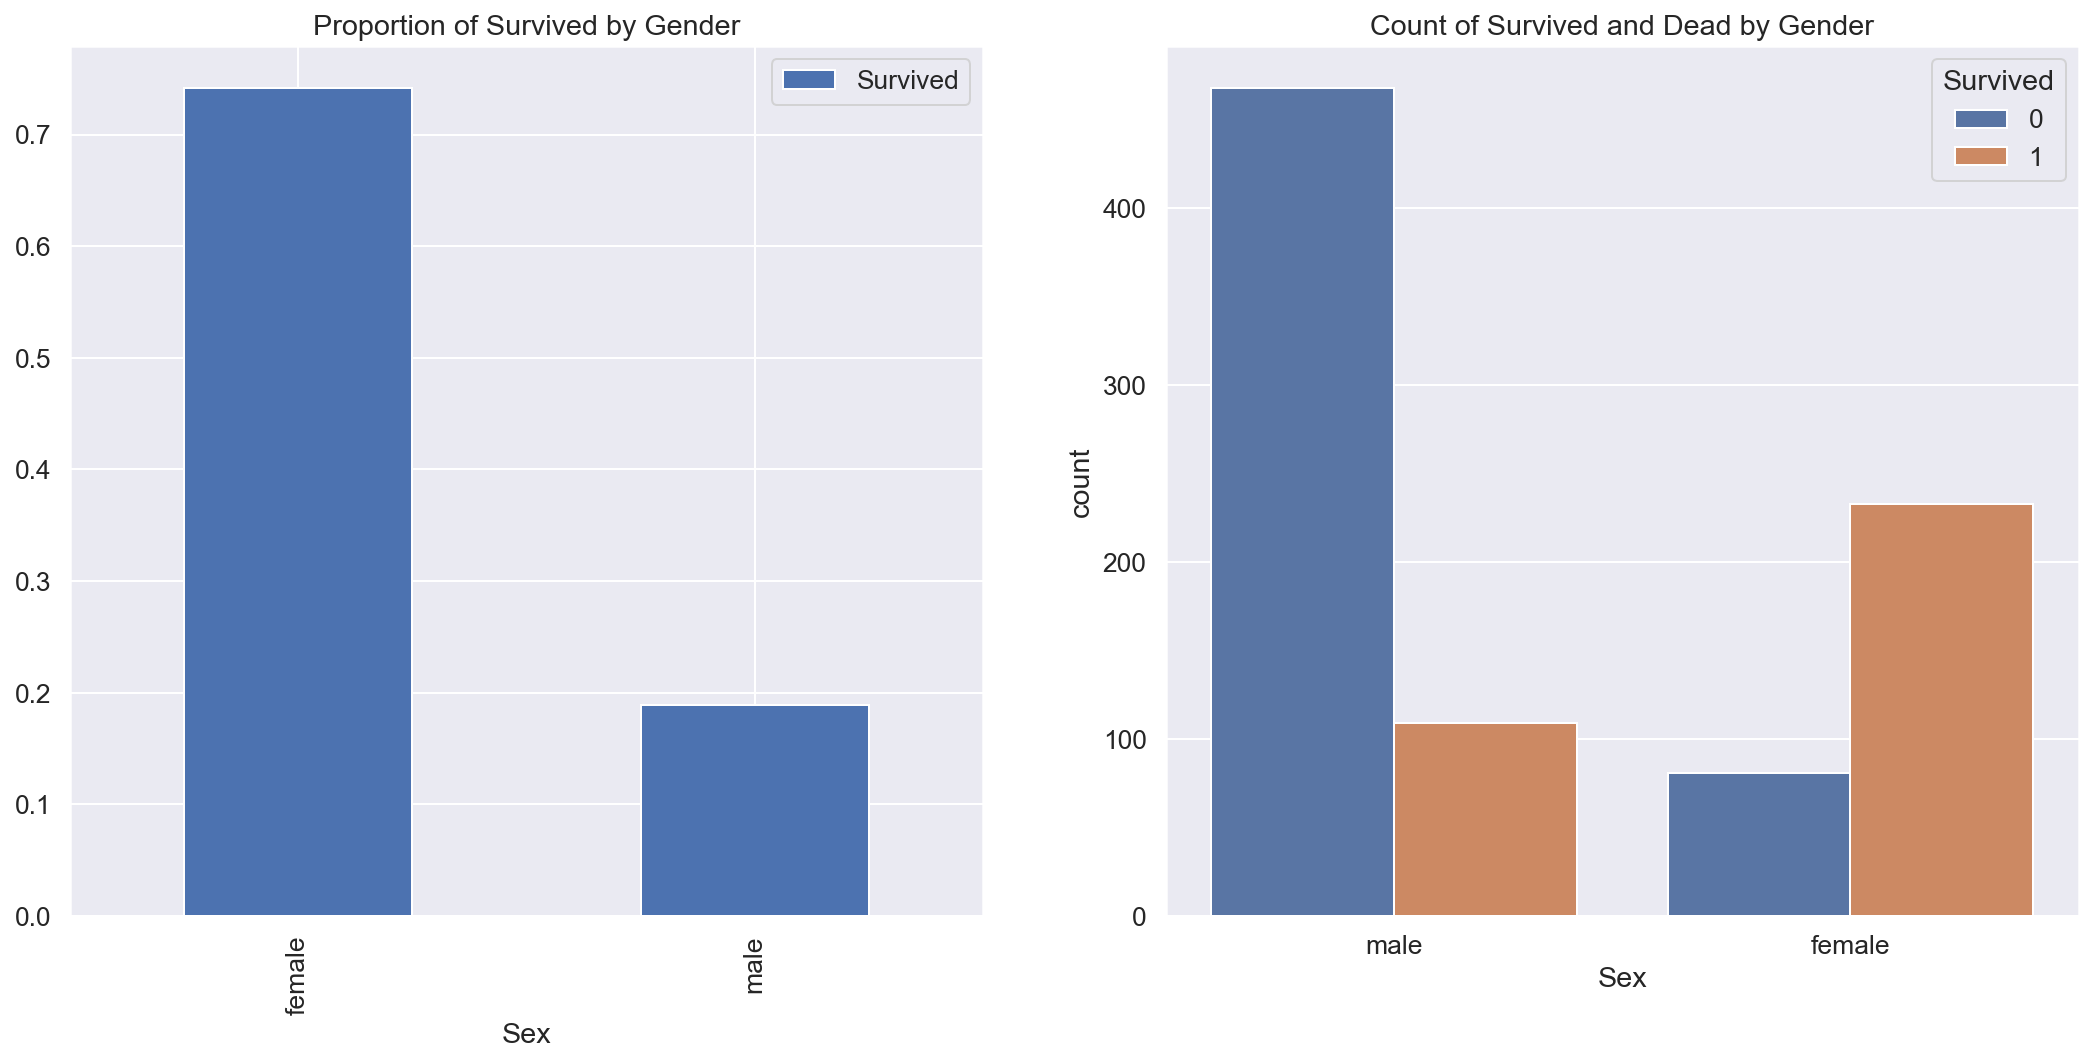

In [188]:
proportion_gender = df[['Sex','Survived']].groupby(['Sex']).mean()
count_survived_dead = df[['Sex','Survived']].groupby(['Sex']).mean()

print("Proportion Survived by Gender")
print(proportion_gender)
print()
print('Count Survived and Dead by Gender')
print(df.groupby(['Sex', 'Survived'])['Name'].count())

f,ax=plt.subplots(1,2,figsize=(18,8))
count_survived_dead.plot.bar(ax=ax[0])
ax[0].set_title('Proportion of Survived by Gender')
sns.countplot(x='Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Count of Survived and Dead by Gender')
plt.show()

There was almost double the number of males on the ship than females, but the rate of survival for females was much higher than males. 74% of females survived while 19% of the male passengers survived

### Does the ticket class affect the survival rate?

Count of Passenger Per Ticket Class
1    216
2    184
3    491
Name: Pclass, dtype: int64

Proportion of Passenger in Ticket Class
1    0.242424
2    0.206510
3    0.551066
Name: Pclass, dtype: float64


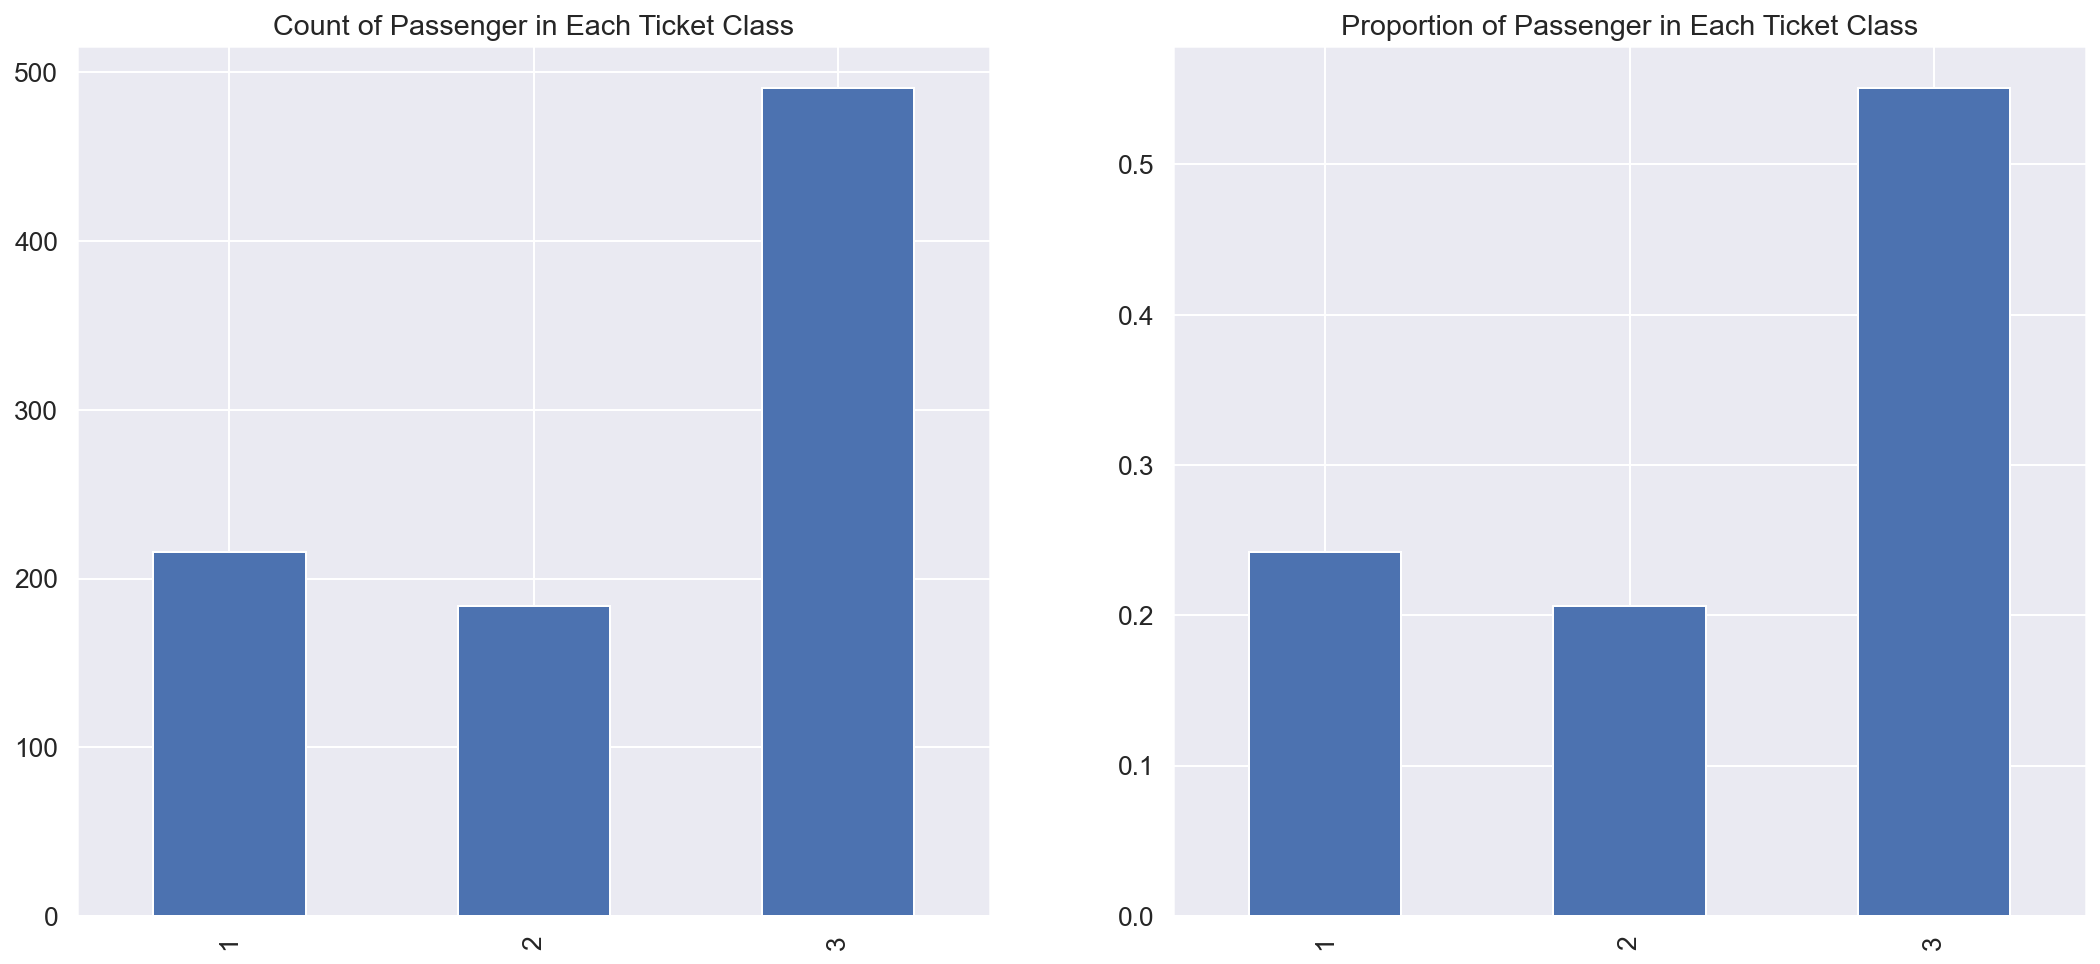

In [189]:
count_passenger_class = df['Pclass'].value_counts().sort_index()
prop_passenger_class = count_passenger_class/len(df)

print('Count of Passenger Per Ticket Class')
print(count_passenger_class)
print()
print('Proportion of Passenger in Ticket Class')
print(prop_passenger_class)

f,ax=plt.subplots(1,2,figsize=(18,8))
count_passenger_class.plot.bar(ax=ax[0])
ax[0].set_title('Count of Passenger in Each Ticket Class')
prop_passenger_class.plot.bar(ax=ax[1])
ax[1].set_title('Proportion of Passenger in Each Ticket Class')
plt.show()

Of the three different classes, 3rd class by itself accounts of 55% of the passengers. This is most likely due to 3rd class being the lowest deck and the most affordable for individuals who just wanted to get to New York City and was not on the boat to enjoy the luxuries. The 1st class was the second most popular class with 24% of the passengers because those were the rich individuals who were on the boat for the luxuries and the 1st class is where the luxuries of the ship really shine. The 2nd class was not as popular as the other two classes because it does not appeal like the other classes do. It does not have anything special to offer. The 1st class offers the extravagance while 3rd class offers affordability. The second class only offers a little better quality of living on the boat.

Proportion Survived by Ticket Class
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

Count of Survival by Ticket Class
Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Name, dtype: int64


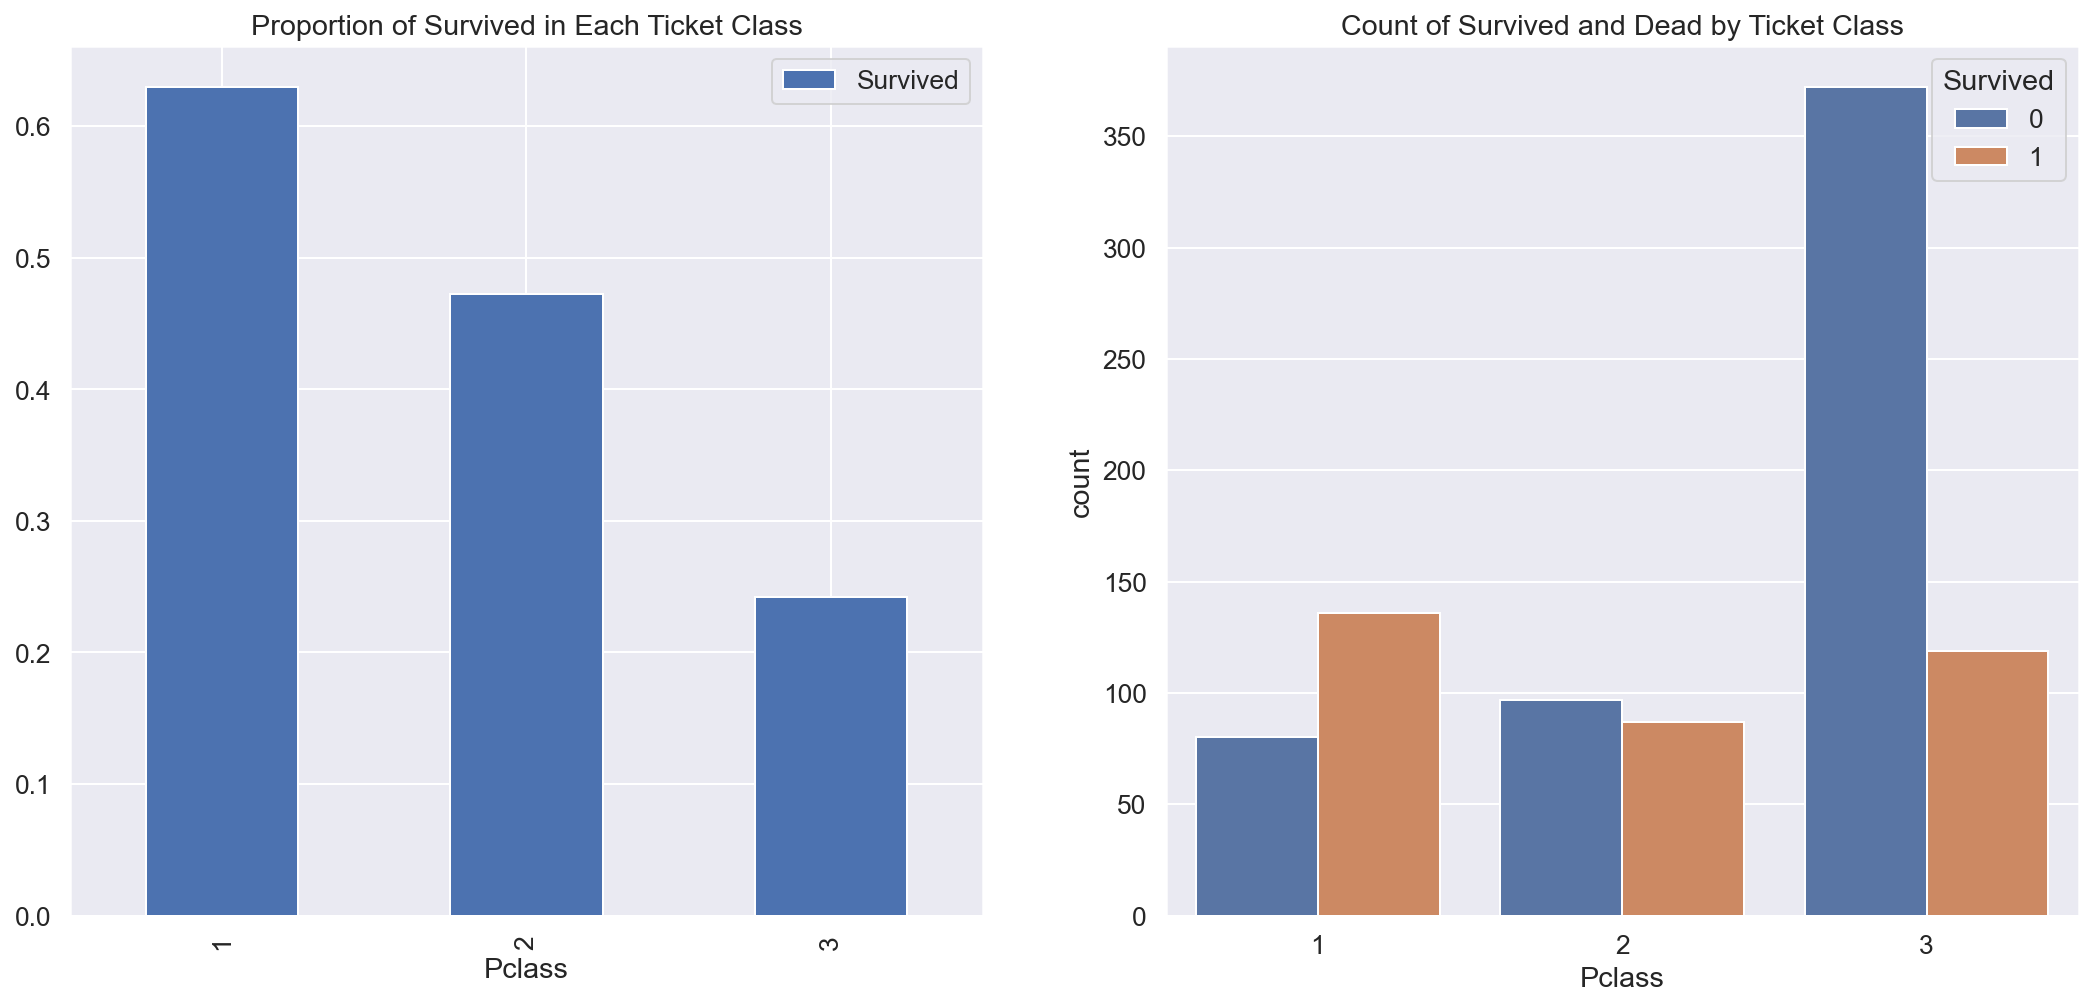

In [190]:
prop_survived_class = df[['Survived', 'Pclass']].groupby('Pclass').mean()
count_survival_class = df.groupby(['Pclass', 'Survived'])['Name'].count()

print('Proportion Survived by Ticket Class')
print(prop_survived_class)
print()
print('Count of Survival by Ticket Class')
print(count_survival_class)

f,ax=plt.subplots(1,2,figsize=(18,8))
prop_survived_class.plot.bar(ax=ax[0])
ax[0].set_title('Proportion of Survived in Each Ticket Class')
sns.countplot(x='Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Count of Survived and Dead by Ticket Class')
plt.show()

Survival Rates
- 1st Class: 63%
- 2nd Class: 47%
- 3rd Class: 24%

The most common Ticket class of the titanic was 3rd class which held more than double the passenger count of the other classes. Although most of the passengers were in third class, we can see that it was the unsafest level within the boat. By the proportion of survival by ticket class, we can also see that the higher tier tickets have shown a higher rate of survival for those people. This may be due to a quicker passage to the emergency life boats which gives them a higher priority to the boats compared to the lower deck individuals.

### Does the Port of Embarkation affect Survival Rate?

Count of Passenger Embarked by Port
S    644
C    168
Q     77
Name: Embarked, dtype: int64

Proportion of Passenger Embarked
S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64


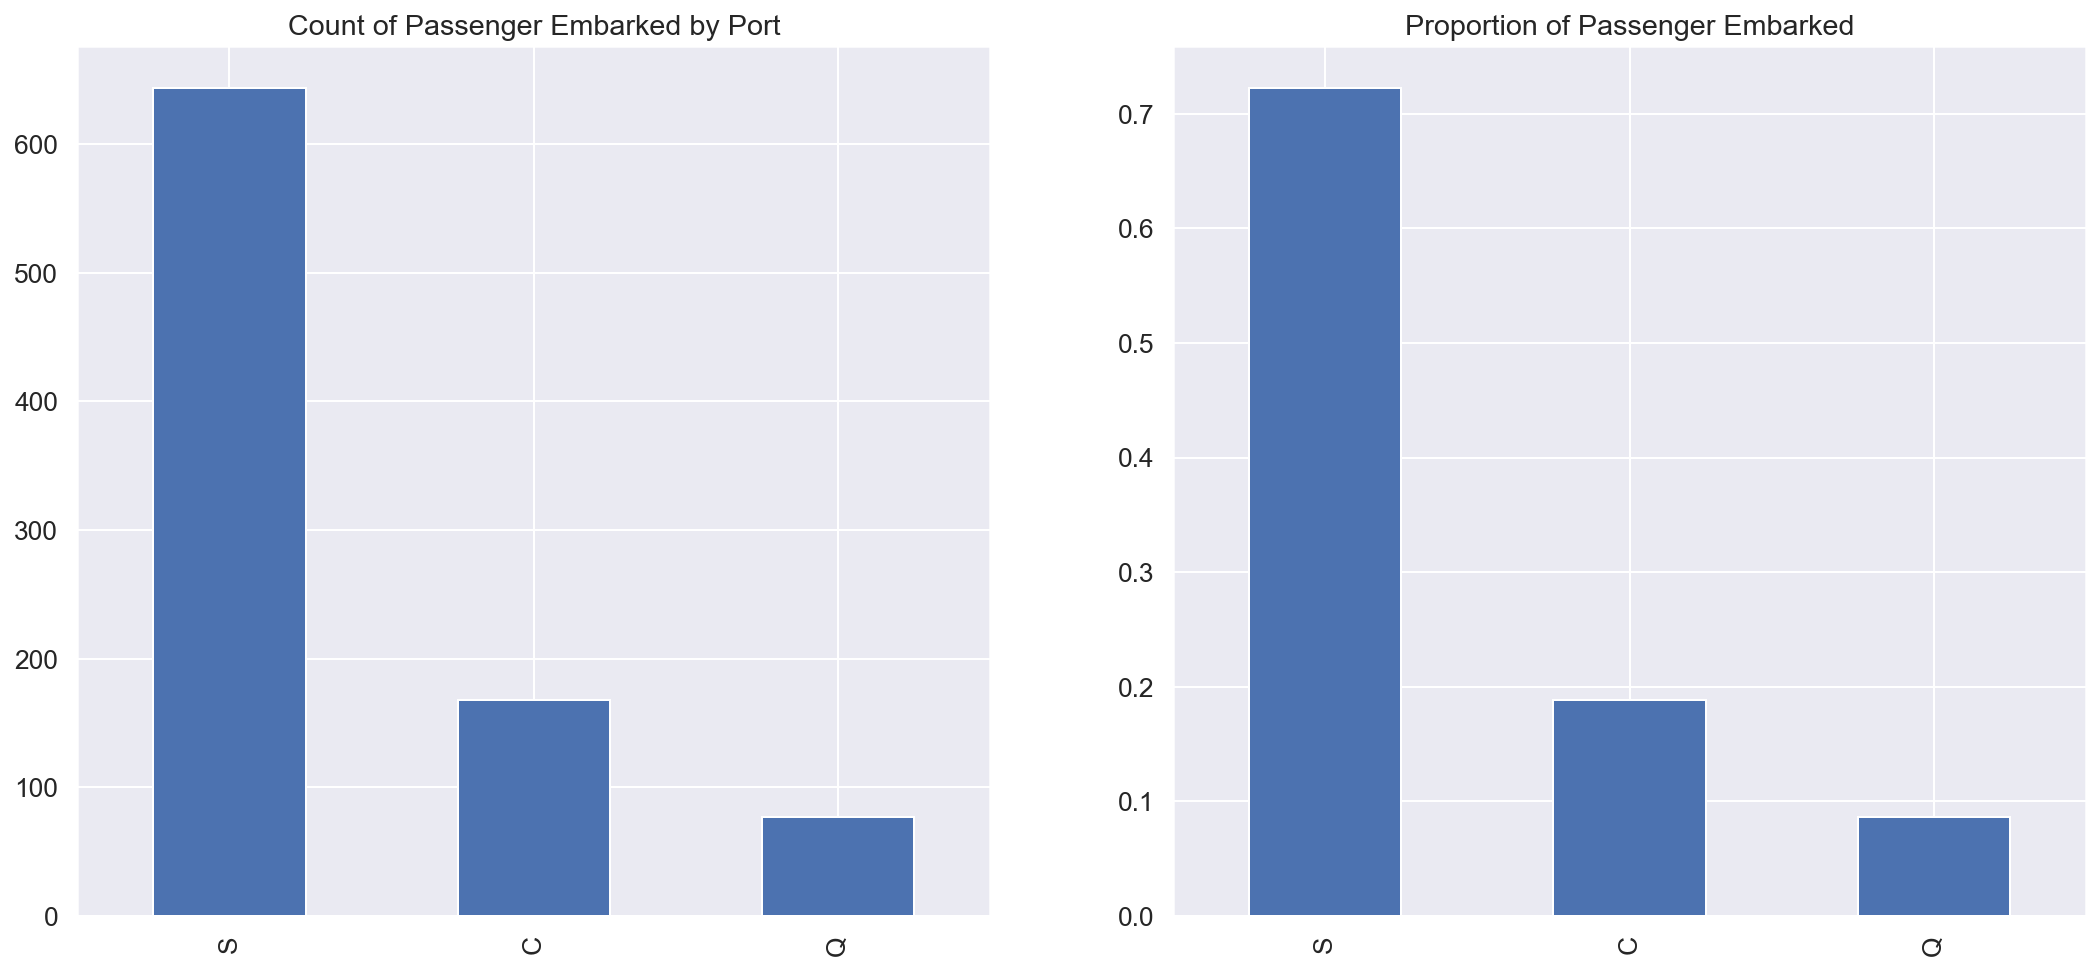

In [191]:
count_embarked = df['Embarked'].value_counts()
proportion_embarked = count_embarked/len(df)

print('Count of Passenger Embarked by Port')
print(count_embarked)
print()
print('Proportion of Passenger Embarked')
print(proportion_embarked)

f,ax=plt.subplots(1,2,figsize=(18,8))
count_embarked.plot.bar(ax=ax[0])
ax[0].set_title('Count of Passenger Embarked by Port')
proportion_embarked.plot.bar(ax=ax[1])
ax[1].set_title('Proportion of Passenger Embarked')
plt.show()

Ports
- S = Southampton
- C = Cherbourg
- Q = Queenstown



A majority of the passengers boarded on the Titanic from the Southampton port which accounts for 644 of the 891 passengers. The next popular port was the Cherbourg port which only accounted for 168 of the 891. The least popular port was the Queenstown port which only accounted for 77 of the 891. 2 of the passengers did not have a listed port of embarkment but there is a good chance that it would have been the Southampton Port because 72% of the passengers boarded from there.



In [192]:
#Imputating 2 NaN values in Embarked
df['Embarked'] = df['Embarked'].fillna('S')

Count of Passenger of Each Class by Port of Embarkation
Embarked  Pclass
S         1         129
          2         164
          3         353
Q         1           2
          2           3
          3          72
C         1          85
          2          17
          3          66
Name: Name, dtype: int64


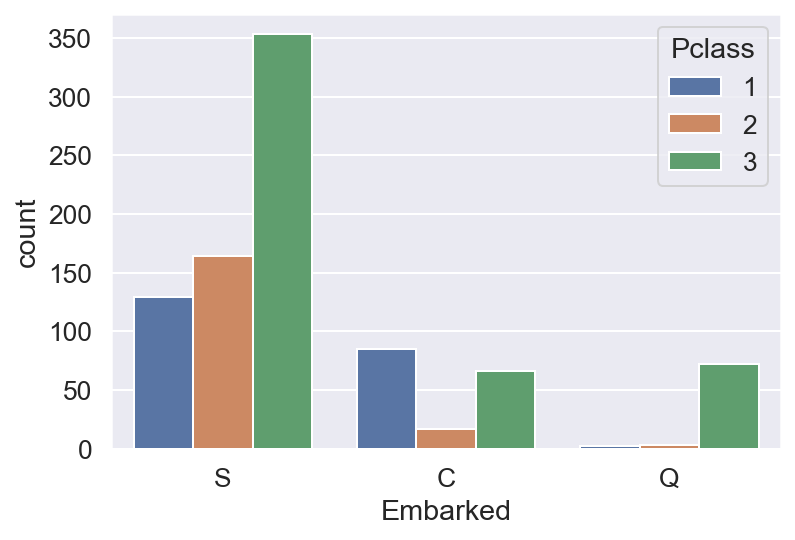

In [193]:
print('Count of Passenger of Each Class by Port of Embarkation')
print(df.groupby(['Embarked', 'Pclass'])['Name'].count().reindex(['S','Q','C'], level=0))

sns.countplot(x='Embarked',hue='Pclass',data=df)
plt.show()

In the ticket class distribution for each port, we can see that the majority ticket class for Southampton and Queenstown was 3rd class while Cherbourg wa 1st class. We would expect 3rd class to be the majority ticket class for all the ports because it was the most common ticket. It probably was not for Queenstown because the surrounding area may represent a more wealthy area compared to the other ports.

Proportion of Survival by Port of Embarkation
          Survived
Embarked          
S         0.336957
C         0.553571
Q         0.389610

Count of Survival by Port of Embarkation
Embarked  Survived
S         0           427
          1           219
Q         0            47
          1            30
C         0            75
          1            93
Name: Name, dtype: int64


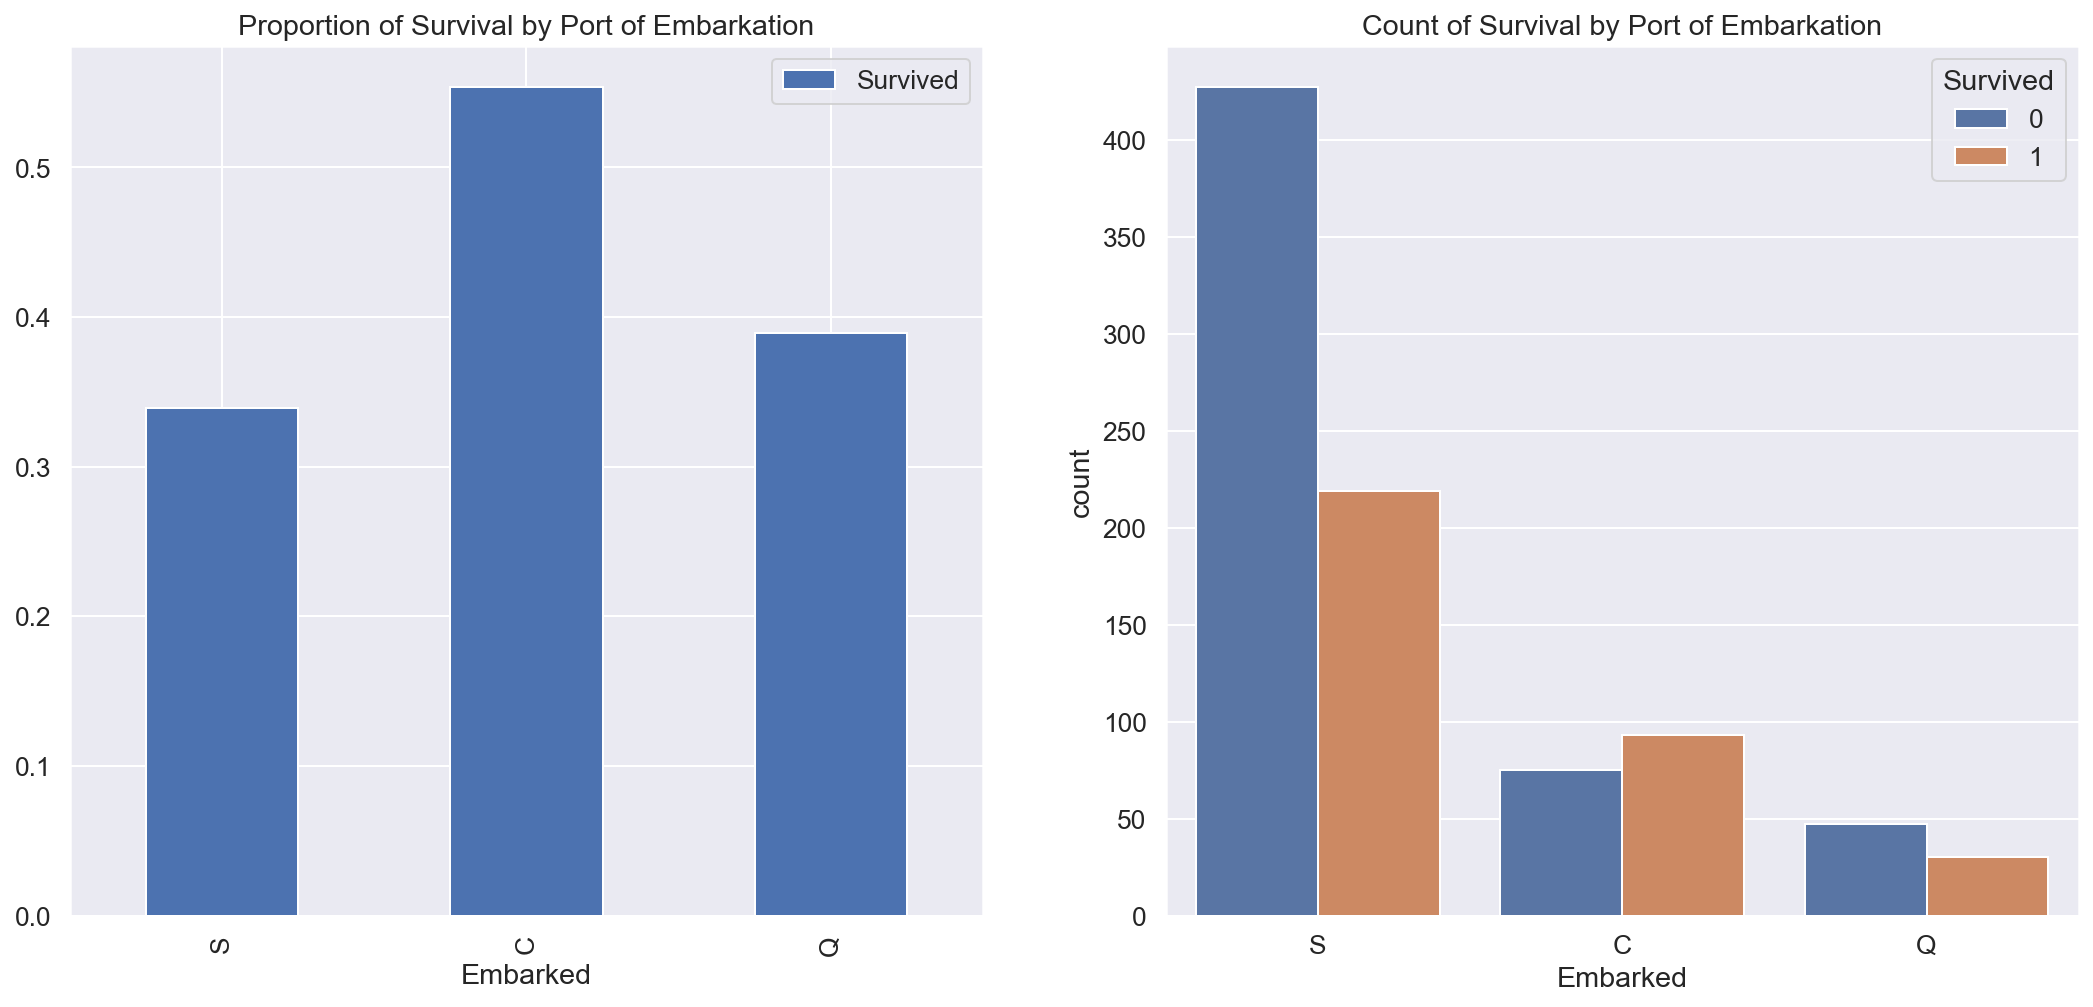

In [194]:
prop_survival_port = df[['Survived', 'Embarked']].groupby('Embarked').mean().reindex(['S','C','Q'])
count_survival_port = df.groupby(['Embarked', 'Survived'])['Name'].count().reindex(['S','Q','C'], level=0)

print('Proportion of Survival by Port of Embarkation')
print(prop_survival)
print()
print('Count of Survival by Port of Embarkation')
print(count_survival_port)

f,ax=plt.subplots(1,2,figsize=(18,8))
prop_survival_port.plot.bar(ax=ax[0])
ax[0].set_title('Proportion of Survival by Port of Embarkation')
sns.countplot(x='Embarked',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Count of Survival by Port of Embarkation')
plt.show()


Here we see that the rate of survival for the embarkment at Cherbourg was much higher at 55% while Southampton had a 34% rate of survival and Queenstown had a 39% rate of survival. This makes sense for Cherbourg to have a higher rate of survival because we saw that the majority loaded at Cherbourg were 1st class ticket holders and also we saw that 1st class ticket holders had a higher chance of survival.

### Does Family Affect Rate of Survival?

- Does having Siblings/Spouses onboard make the individual more likely to survive?
- Does having Parents/Children onboard make the individual more likely to survive?
- Does having a bigger family size make the individual more likely to survive?


- Reasons Why It Could Go Either Way
    - Maybe more likely to survive because have the extra motivation to get out alive for their Siblings/Spouses/Parents/Children
    - Maybe less likely to survive because they are willing to sacrifice themselves to let their Siblings/Spouses/Parents/Children have a better chance of survival

#### Does having Siblings/Spouses onboard make the individual more likely to survive?

Sibling/Spouse Count
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

Sibling/Spouse Proportion
0    0.682379
1    0.234568
2    0.031425
3    0.017957
4    0.020202
5    0.005612
8    0.007856
Name: SibSp, dtype: float64


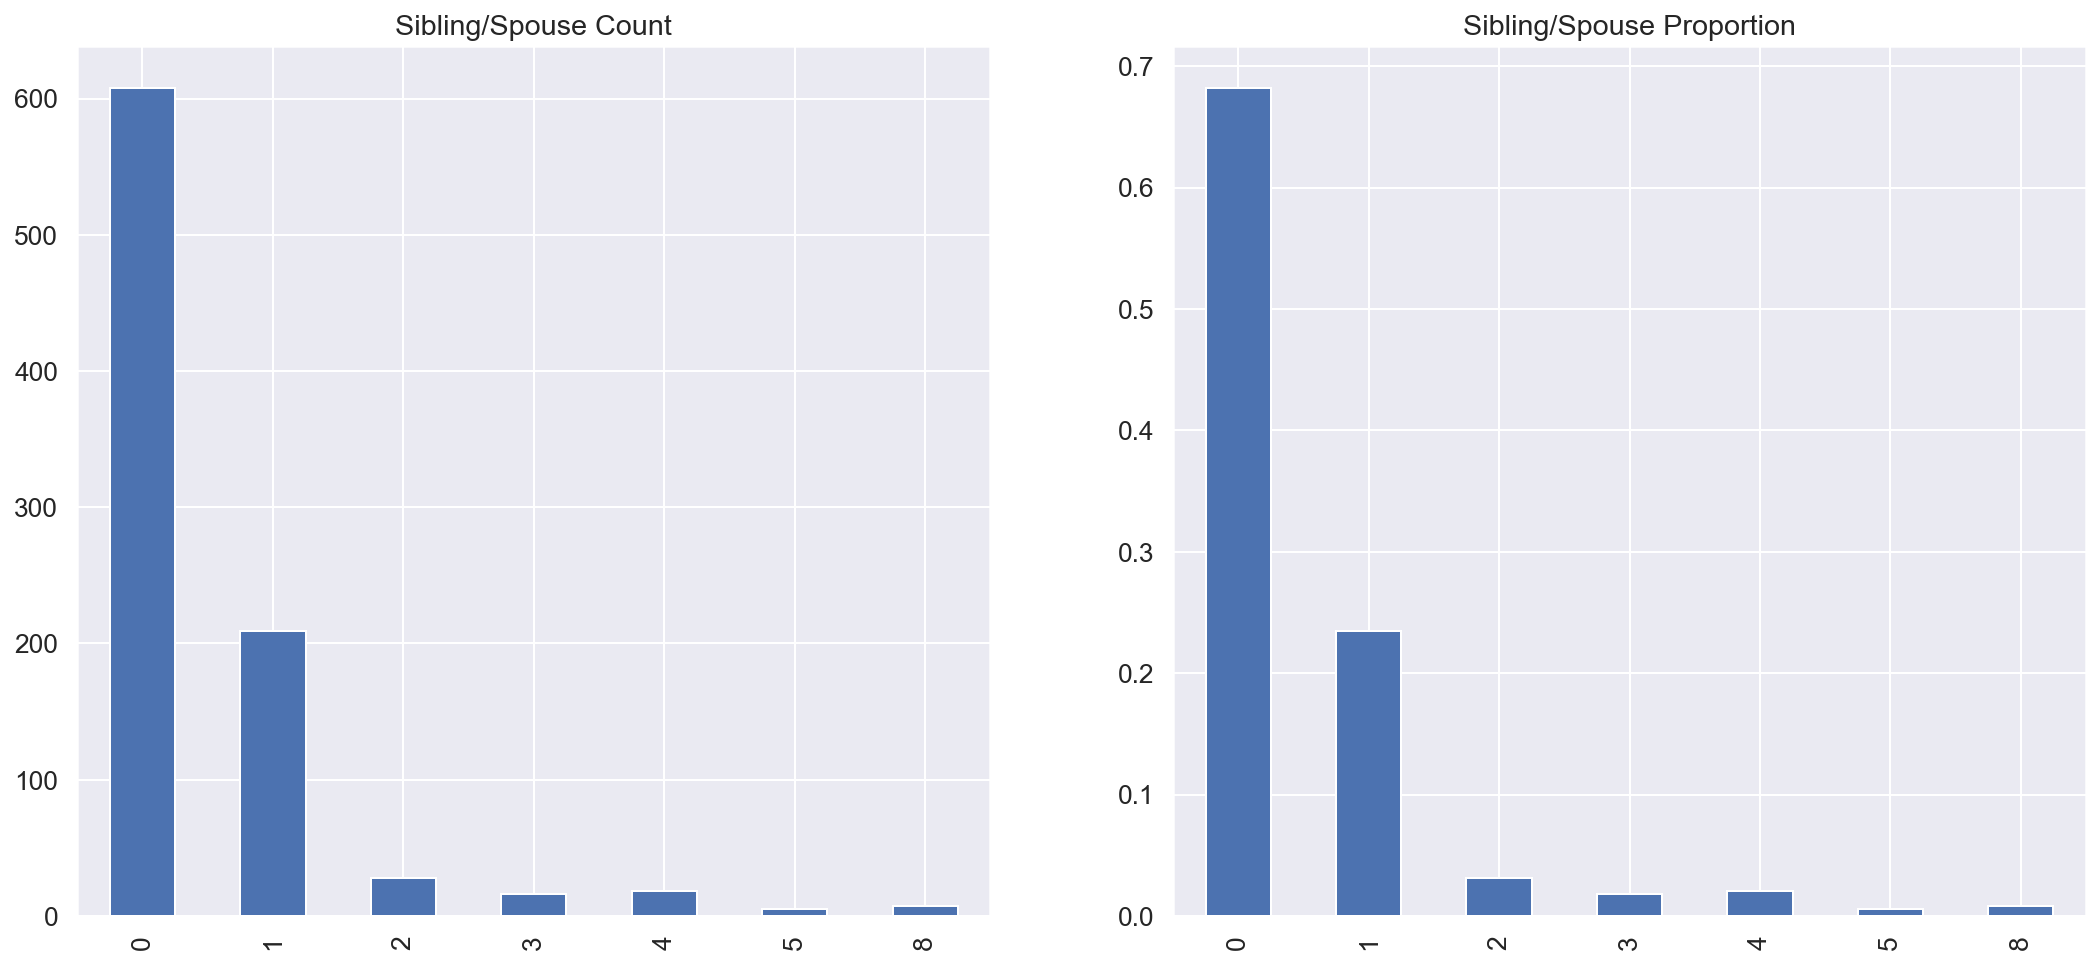

In [217]:
sibsp_count = df['SibSp'].value_counts().sort_index()

print('Sibling/Spouse Count')
print(sibsp_count)
print()
print('Sibling/Spouse Proportion')
print(sibsp_count/len(df))

f,ax=plt.subplots(1,2,figsize=(18,8))
sibsp_count.plot.bar(ax=ax[0])
ax[0].set_title('Sibling/Spouse Count')
(sibsp_count/len(df)).plot.bar(ax=ax[1])
ax[1].set_title('Sibling/Spouse Proportion')
plt.show()

As we can see above, 68% of the passengers on the ship did not have a sibling/spouse with them. This most likely had to do with how expensive the tickets were and many of the passengers were immigrants heading from Europe to America. 23% of the passengers had 1 sibling/spouse on the ship which was most likely just a vacation with their spouse for those in first class because those were the wealthy individuals who could afford a extra ticket.

Count of Survival by Sibling/Spouse Count
SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Name, dtype: int64

Proportion of Survival by Sibling/Spouse Count
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000

Count of Class by Sibling/Spouse Count
SibSp  Pclass
0      1         137
       2         120
       3         351
1      1          71
       2          55
       3          83
2      1           5
       2           8
       3          15
3      1           3
       2           1
       3          12
4      3          18
5      3           5
8      3           7
Name: Name, dtype: int64


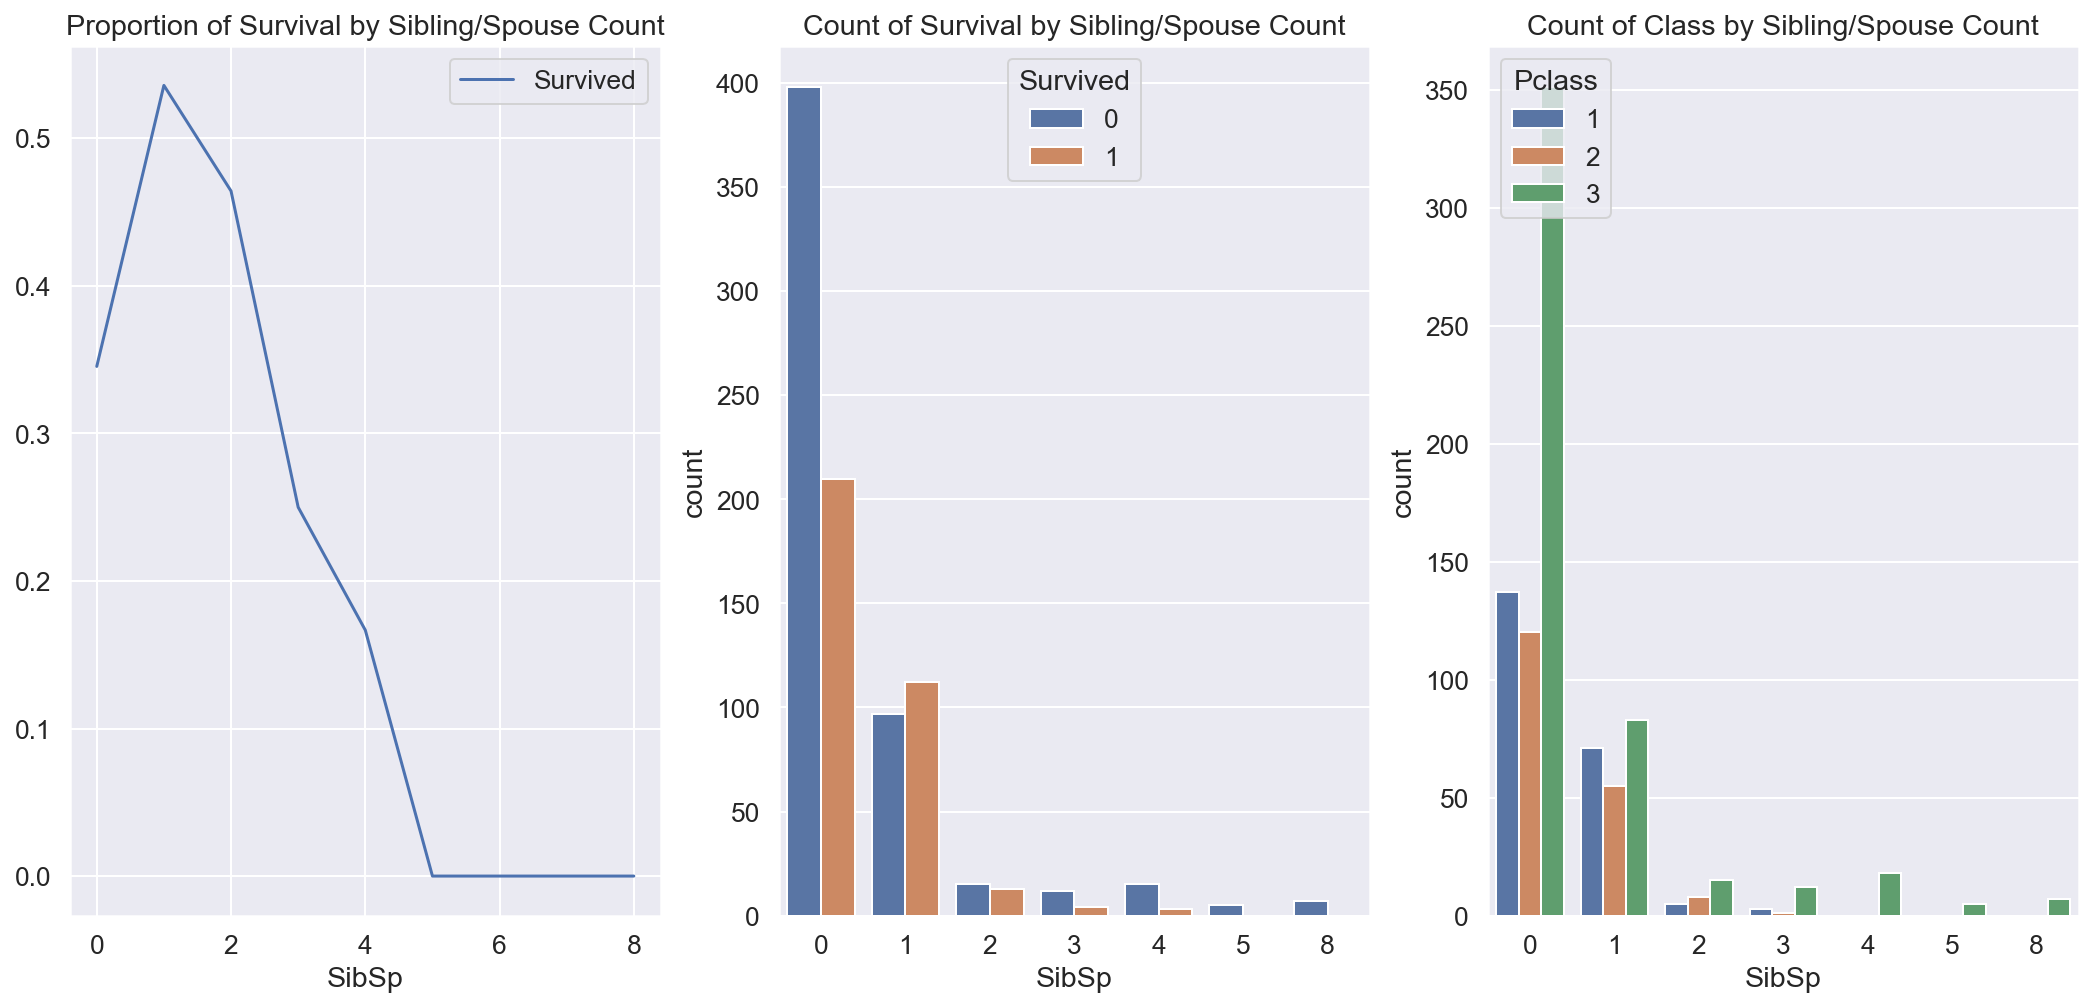

In [237]:
count_sibsp_survival = df.groupby(['SibSp', 'Survived'])['Name'].count()
sibsp_survival_prop = df[['Survived', 'SibSp']].groupby('SibSp').mean()
count_class_sibsp = df.groupby(['SibSp', 'Pclass'])['Name'].count()

print('Count of Survival by Sibling/Spouse Count')
print(count_sibsp_survival)
print()
print('Proportion of Survival by Sibling/Spouse Count')
print(sibsp_survival_prop)
print()
print('Count of Class by Sibling/Spouse Count')
print(count_class_sibsp)

f,ax=plt.subplots(1,3,figsize=(18,8))
sibsp_survival_prop.plot.line(ax=ax[0])
ax[0].set_title('Proportion of Survival by Sibling/Spouse Count')
sns.countplot(x='SibSp', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Count of Survival by Sibling/Spouse Count')
sns.countplot(x='SibSp', hue='Pclass', data=df, ax=ax[2])
ax[2].set_title('Count of Class by Sibling/Spouse Count')
plt.show()

There is a higher rate of survival for 1 spouse/sibling because the ticket class distribution were about even compared to 0 spouse/siblings where 3rd class significantly outweighted the other classes.

The 0 spouse/siblings rate of survival was brought down because the large amount of 3rd class meant that less people survived since 3rd class had significant lower rate of survival.

As the number of spouses/siblings grow larger, the rate of survival starts to decline because it could be more people that they have to focus on or it is a whole family in third class trying to immigrate to the United States.

#### Does having Parents/Children onboard make the individual more likely to survive?

#### Does having a bigger family size make the individual more likely to survive?

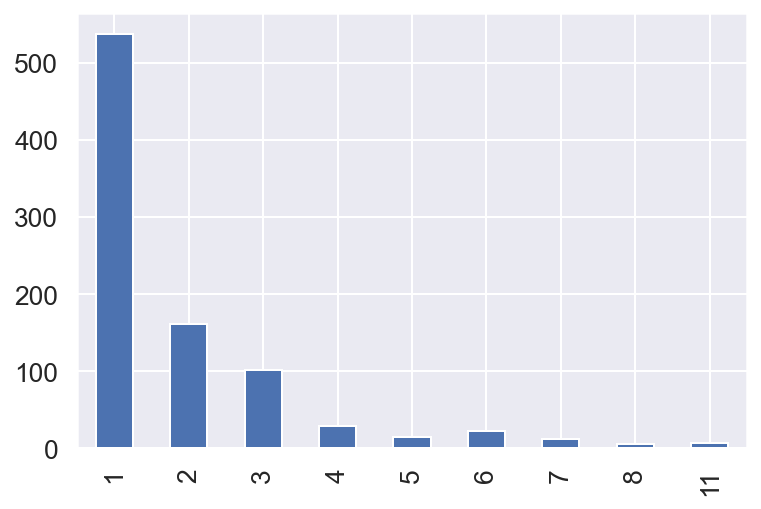

In [206]:
df['Fam'] = df['SibSp'] + df['Parch'] + 1 # Includes Siblings/Spouses/Parents/Children and +1 for the individual
df['Fam'].value_counts().sort_index().plot.bar()
plt.show()

Survival if has siblings or spouses aboard

In [180]:
df.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Survival if has parents or children aboard

In [181]:
df.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [176]:
df.groupby('Fam_Size')['Survived'].mean()

Fam_Size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [178]:
df.groupby('Fam_Size')['Name'].count()

Fam_Size
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: Name, dtype: int64

In [174]:
df.groupby(['Fam_Size', 'Survived']).count()

Pclass  Name  Sex  Age  SibSp  Parch  Fare  Embarked
Fam_Size Survived                                                      
1        0            374   374  374  274    374    374   374       374
         1            163   163  163  130    163    163   163       163
2        0             72    72   72   63     72     72    72        72
         1             89    89   89   76     89     89    89        89
3        0             43    43   43   40     43     43    43        43
         1             59    59   59   53     59     59    59        59
4        0              8     8    8    6      8      8     8         8
         1             21    21   21   21     21     21    21        21
5        0             12    12   12    8     12     12    12        12
         1              3     3    3    3      3      3     3         3
6        0             19    19   19   19     19     19    19        19
         1              3     3    3    3      3      3     3         3
7        0              8     8    8    8      8      8     8         8
         1              4     4    4    4      4      4     4         4
8        0              6     6    6    6      6      6     6         6
11       0              7     7    7    0      7      7     7         7

In [ ]:
#line graph to show rate of survival verses fam size

### Does Higher Fare Equate to Higher Survival?

### Is There A Certain Age by Decade That is More Likely to Survive?

Ex: Parents may sacrifice themselves to let their kids get on an emergency boat

To impute age, pull age from distribution

Bin age into decades and check what bins survied the most versus least. bar graph

## ML Baseline Model

## ML Improved Model